# classifying 2 different names if date mentioned then printing as age

In [2]:
import spacy

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

def extract_information(text):
    doc = nlp(text)

    patient_name = None
    patient_age = None
    doctor_name = None
    disease = None

    # Extract information using spaCy
    for entity in doc.ents:
        if entity.label_ == "PERSON":
            if not patient_name:
                patient_name = entity.text
            elif not doctor_name:
                doctor_name = entity.text
        elif entity.label_ == "DATE":
            if not patient_age:
                patient_age = entity.text
        elif entity.label_ == "DISEASE":
            if not disease:
                disease = entity.text

    return patient_name, patient_age, doctor_name, disease

if __name__ == "__main__":
    text = "Hello, my name is John, and I'm 42 years old. I've been experiencing persistent coughing, shortness of breath, and chest pain, which has me worried. I believe I might be suffering from a respiratory issue. I'd like to schedule an appointment with Dr. Anderson, as I've heard good reviews about his expertise in this area. Additionally, I have a history of allergies, which might be relevant to my current condition."

    patient_name, patient_age, doctor_name, disease = extract_information(text)
    print("Patient Name:", patient_name)
    print("Patient Age:", patient_age)
    print("Doctor Name:", doctor_name)
    print("Disease:", disease)

Patient Name: John
Patient Age: 42 years old
Doctor Name: Anderson
Disease: None


# just capturing audio and converting to text 

In [3]:
import speech_recognition as sr
import time

# Initialize the recognizer
recognizer = sr.Recognizer()

# Capture audio from the microphone until a pause is detected
with sr.Microphone() as source:
    print("Please speak something...")

    # Adjust for ambient noise before listening
    recognizer.adjust_for_ambient_noise(source)

    start_time = time.time()  # Record the start time
    audio = recognizer.listen(source, timeout=15)  # Capture audio for up to 15 seconds
    end_time = time.time()  # Record the end time

    print("Audio capture complete.")
    capture_duration = end_time - start_time  # Calculate the capture duration
    print("Audio capture duration: {:.2f} seconds".format(capture_duration))

# Convert the audio to text using Google Web Speech API
try:
    text = recognizer.recognize_google(audio)
    print("You said: " + text)
except sr.UnknownValueError:
    print("Google Web Speech API could not understand the audio.")
except sr.RequestError as e:
    print("Could not request results from Google Web Speech API; {0}".format(e))


Please speak something...
Audio capture complete.
Audio capture duration: 3.70 seconds
You said: hi hello this is Vamshi


# Model testing with AI generated transcripts with out audio integration and disease classifications|

In [4]:
import spacy
import csv

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

def extract_information(text):
    doc = nlp(text)

    patient_name = None
    patient_age = None
    doctor_name = None
    disease = None

    # Extract information using spaCy
    for entity in doc.ents:
        if entity.label_ == "PERSON":
            if not patient_name:
                patient_name = entity.text
            elif not doctor_name:
                doctor_name = entity.text
        elif entity.label_ == "DATE":
            if not patient_age:
                patient_age = entity.text
        elif entity.label_ == "DISEASE":
            if not disease:
                disease = entity.text

    return patient_name, patient_age, doctor_name, disease

if __name__ == "__main__":
    # Open and read data from the CSV file
    with open("sampledata.csv", "r", newline='') as csvfile:
        reader = csv.DictReader(csvfile)

        for row in reader:
            text = row["transcript"]  # Assuming that the CSV file has a column named "transcript" containing the text data.
            patient_name, patient_age, doctor_name, disease = extract_information(text)
            print("Patient Name:", patient_name)
            print("Patient Age:", patient_age)
            print("Doctor Name:", doctor_name)
            print("Disease:", disease)
            print()

    # Additional data you provided
    additional_data = [
        {"S.NO": "6", "transcript": "Additional transcript for data 6."},
        {"S.NO": "7", "transcript": "Additional transcript for data 7."},
    ]

    for row in additional_data:
        text = row["transcript"]
        patient_name, patient_age, doctor_name, disease = extract_information(text)
        print("Patient Name:", patient_name)
        print("Patient Age:", patient_age)
        print("Doctor Name:", doctor_name)
        print("Disease:", disease)
        print()


Patient Name: Emily Turner
Patient Age: 28-year-old
Doctor Name: Martinez
Disease: None

Patient Name: David Smith
Patient Age: 45 years of age
Doctor Name: Carter
Disease: None

Patient Name: Maria Rodriguez
Patient Age: 38 years old
Doctor Name: Patel
Disease: None

Patient Name: James Mitchell
Patient Age: 50 years old
Doctor Name: Baker
Disease: None

Patient Name: Sarah Davis
Patient Age: 31-year-old
Doctor Name: Harris
Disease: None

Patient Name: Daniel Brown
Patient Age: 55 years old
Doctor Name: Taylor
Disease: None

Patient Name: Olivia White
Patient Age: 22-year-old
Doctor Name: Anderson
Disease: None

Patient Name: Michael Turner
Patient Age: 40 years old
Doctor Name: Garcia
Disease: None

Patient Name: Lisa Wilson
Patient Age: 30 years of age
Doctor Name: Martinez
Disease: None

Patient Name: Richard Clark
Patient Age: 62-year-old
Doctor Name: Johnson
Disease: None

Patient Name: Rebecca Miller
Patient Age: 36 years old
Doctor Name: Jackson
Disease: None

Patient Name: Rob

# Testing Disease classification from given data CSV DATA

In [5]:
import spacy
import csv
import re

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Function to load diseases from "data2.csv"
def load_diseases(file_path):
    diseases = set()
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            diseases.add(row[0].strip().lower())
    return diseases

diseases_list = load_diseases("data2.csv")

def extract_information(text):
    doc = nlp(text)

    patient_name = None
    patient_age = None
    doctor_name = None
    symptoms_and_diseases = []

    for entity in doc.ents:
        if entity.label_ == "PERSON":
            if not patient_name:
                patient_name = entity.text
            elif not doctor_name:
                doctor_name = entity.text
        elif entity.label_ == "DATE":
            if not patient_age:
                patient_age = entity.text

    # Extract symptoms and diseases using regular expressions
    symptom_pattern = re.compile(r'\b(?:fever|nausea|migraines|dizziness|pain|fatigue|malaise|anxiety|panic|difficulty concentrating)\b', re.I)
    disease_pattern = re.compile(r'\b(?:' + '|'.join(re.escape(d) for d in diseases_list) + r')\b', re.I)

    symptoms = re.findall(symptom_pattern, text)
    diseases = re.findall(disease_pattern, text)

    symptoms_and_diseases.extend(symptoms)
    symptoms_and_diseases.extend(diseases)

    return patient_name, patient_age, doctor_name, symptoms_and_diseases

if __name__ == "__main__":
    # Open and read the sample data from the provided structure
    data = [
        {"S.NO": "1", "transcript": "Greetings, I am Emily Turner, a 28-year-old individual. I've been grappling with severe joint, malaria, fever, pain and inflammation, which is significantly impacting my daily life. I'd like to consult with Dr. Martinez, a renowned rheumatologist. In addition, I have a family history of autoimmune diseases that I believe is pertinent."},
        {"S.NO": "2", "transcript": "I am David Smith, 45 years of age. Lately, I've been experiencing bouts of dizziness, nausea, and migraines, causing me a great deal of discomfort. I would appreciate an appointment with Dr. Carter, dengue a neurologist known for his expertise in such matters. Furthermore, I need to mention a recent change in my vision that has been concerning."},
        {"S.NO": "3", "transcript": "My name is Maria Rodriguez, and I'm 38 years old. I've been dealing with persistent abdominal pain and digestive issues. chest pain I suspect it might be related to my family's history of gastrointestinal problems. I'd like to meet with Dr. Patel, a gastroenterologist, to address my concerns."},
        {"S.NO": "4", "transcript": "Hello, I'm James Mitchell, 50 years old. I've been having trouble sleeping, experiencing constant fatigue, and have noticed malaise a significant change in my appetite. I'm considering a consultation with Dr. Baker, a renowned sleep specialist, and I should mention my ongoing stress at work."},
        {"S.NO": "5", "transcript": "I'm Sarah Davis, a 31-year-old patient. Lately, I've been struggling with anxiety, panic attacks, and difficulty concentrating, chest pain impacting my personal and professional life. I'd like to see Dr. Harris, a psychiatrist, to discuss my mental health concerns and recent life changes."}
    ]

    for row in data:
        text = row["transcript"]
        patient_name, patient_age, doctor_name, symptoms_and_diseases = extract_information(text)
        print("Patient Name:", patient_name)
        print("Patient Age:", patient_age)
        print("Doctor Name:", doctor_name)
        if symptoms_and_diseases:
            print("Symptoms/Diseases Found:", ", ".join(symptoms_and_diseases))
        print()


Patient Name: Emily Turner
Patient Age: 28-year-old
Doctor Name: Martinez
Symptoms/Diseases Found: fever, pain, malaria, family history

Patient Name: David Smith
Patient Age: 45 years of age
Doctor Name: Carter
Symptoms/Diseases Found: dizziness, nausea, migraines, dizziness, nausea, dengue

Patient Name: Maria Rodriguez
Patient Age: 38 years old
Doctor Name: Patel
Symptoms/Diseases Found: pain, pain, abdominal pain, chest pain

Patient Name: James Mitchell
Patient Age: 50 years old
Doctor Name: Baker
Symptoms/Diseases Found: fatigue, malaise, fatigue, malaise

Patient Name: Sarah Davis
Patient Age: 31-year-old
Doctor Name: Harris
Symptoms/Diseases Found: anxiety, panic, difficulty concentrating, pain, anxiety, chest pain



# code to check with available data of transcripts and disease database 

In [6]:
import spacy
import csv
import re


nlp = spacy.load("en_core_web_sm")  # Loading English NLP model  

def extract_information(text, diseases_list):
    doc = nlp(text)

    patient_name = None
    patient_age = None
    doctor_name = None
    symptoms = []
    diseases = []

    for entity in doc.ents:
        if entity.label_ == "PERSON":
            if not patient_name:
                patient_name = entity.text
            elif not doctor_name:
                doctor_name = entity.text
        elif entity.label_ == "DATE":
            if not patient_age:
                patient_age = entity.text

    # Creating regular expression patterns for symptoms and diseases
    symptom_pattern = re.compile(r'\b(?:fever|nausea|migraines|dizziness|pain|fatigue|malaise|anxiety|panic|difficulty concentrating)\b', re.I)
    disease_pattern = re.compile(r'\b(?:' + '|'.join(re.escape(d) for d in diseases_list) + r')\b', re.I)

    # Extract symptoms and diseases using regular expressions
    symptoms = re.findall(symptom_pattern, text)
    diseases = re.findall(disease_pattern, text)

    return patient_name, patient_age, doctor_name, symptoms, diseases

if __name__ == "__main__":
    diseases_list = set()
    with open("data2.csv", "r", newline='') as csvfile:
        reader = csv.reader(csvfile)                    #reaading data2 which is of diseases
        for row in reader:
            diseases_list.add(row[0].strip().lower())

   
    with open("sampledata.csv", "r", newline='') as csvfile:   # Open and read data from the CSV file
        reader = csv.DictReader(csvfile)

        for row in reader:
            text = row["transcript"]  # Assuming that the CSV file has a column named "transcript" containing the text data.
            patient_name, patient_age, doctor_name, symptoms, diseases = extract_information(text, diseases_list)
            print("Patient Name:", patient_name)
            print("Patient Age:", patient_age)
            print("Doctor Name:", doctor_name)
            if symptoms:
                print("Symptoms Found:", ", ".join(symptoms))
            if diseases:
                print("Diseases Found:", ", ".join(diseases))
            print()


Patient Name: Emily Turner
Patient Age: 28-year-old
Doctor Name: Martinez
Symptoms Found: pain
Diseases Found: joint pain, family history

Patient Name: David Smith
Patient Age: 45 years of age
Doctor Name: Carter
Symptoms Found: dizziness, nausea, migraines
Diseases Found: dizziness, nausea

Patient Name: Maria Rodriguez
Patient Age: 38 years old
Doctor Name: Patel
Symptoms Found: pain
Diseases Found: abdominal pain

Patient Name: James Mitchell
Patient Age: 50 years old
Doctor Name: Baker
Symptoms Found: fatigue
Diseases Found: fatigue

Patient Name: Sarah Davis
Patient Age: 31-year-old
Doctor Name: Harris
Symptoms Found: anxiety, panic, difficulty concentrating
Diseases Found: anxiety

Patient Name: Daniel Brown
Patient Age: 55 years old
Doctor Name: Taylor
Symptoms Found: fatigue
Diseases Found: weight loss, fatigue

Patient Name: Olivia White
Patient Age: 22-year-old
Doctor Name: Anderson
Diseases Found: acne, mood swings

Patient Name: Michael Turner
Patient Age: 40 years old
Doc

# code that runs in a loop one after one person input taker.

In [7]:
import spacy
import csv
import re
import speech_recognition as sr

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Function to load diseases from "data2.csv"
def load_diseases(file_path):
    diseases = set()
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            diseases.add(row[0].strip().lower())
    return diseases

diseases_list = load_diseases("data2.csv")

def extract_information(text):
    doc = nlp(text)

    patient_name = None
    patient_age = None
    doctor_name = None
    symptoms_and_diseases = []

    for entity in doc.ents:
        if entity.label_ == "PERSON":
            if not patient_name:
                patient_name = entity.text
            elif not doctor_name:
                doctor_name = entity.text
        elif entity.label_ == "DATE":
            if not patient_age:
                patient_age = entity.text

    # Create patterns from the loaded diseases list
    disease_patterns = [re.escape(d) for d in diseases_list]
    disease_pattern = re.compile(r'\b(?:' + '|'.join(disease_patterns) + r')\b', re.I)

    # Extract symptoms and diseases using regular expressions
    symptom_pattern = re.compile(r'\b(?:fever|nausea|migraines|dizziness|pain|fatigue|malaise|anxiety|panic|difficulty concentrating)\b', re.I)

    symptoms = re.findall(symptom_pattern, text)
    diseases = re.findall(disease_pattern, text)

    symptoms_and_diseases.extend(symptoms)
    symptoms_and_diseases.extend(diseases)

    return patient_name, patient_age, doctor_name, symptoms_and_diseases

def recognize_speech():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("Speak something...")
        audio = recognizer.listen(source)

    try:
        text = recognizer.recognize_google(audio)
        return text
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand audio.")
    except sr.RequestError as e:
        print(f"Could not request results from Google Speech Recognition service; {e}")

if __name__ == "__main__":
    while True:
        text = recognize_speech()
        if text:
            print("You said: ", text)
            patient_name, patient_age, doctor_name, symptoms_and_diseases = extract_information(text)
            print("Patient Name:", patient_name)
            print("Patient Age:", patient_age)
            print("Doctor Name:", doctor_name)
            if symptoms_and_diseases:
                print("Symptoms/Diseases Found:", ", ".join(symptoms_and_diseases))
            print()


Speak something...
You said:  hay hello this is Vamshi my age is about 17 I want to meet Dr Jaishankar I am suffering from dengue and malaria
Patient Name: Dr Jaishankar
Patient Age: None
Doctor Name: None
Symptoms/Diseases Found: dengue, malaria

Speak something...
Google Speech Recognition could not understand audio.
Speak something...
Google Speech Recognition could not understand audio.
Speak something...
Google Speech Recognition could not understand audio.
Speak something...


KeyboardInterrupt: 

# Full code with 
## 1.Voice to text
## 2.Text to classification 
## 3. Output as i)Patient Name
## ii)Patient Age
## iii)Doctor Name
## iv)Symptoms/Diseases Found

In [ ]:
import spacy
import csv
import re
import speech_recognition as sr

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Function to load diseases from "data2.csv"
def load_diseases(file_path):
    diseases = set()
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            diseases.add(row[0].strip().lower())
    return diseases

diseases_list = load_diseases("data2.csv")
#############################################################################
def extract_information(text):
    doc = nlp(text)   #LP model and creates a Doc object, which represents the analyzed text.

    patient_name = None
    patient_age = None
    doctor_name = None
    symptoms_and_diseases = []           #using spacy model classifies 
                                         #person,age and doctor name to none  
    for entity in doc.ents:              #
        if entity.label_ == "PERSON":
            if not patient_name:
                patient_name = entity.text
            elif not doctor_name:
                doctor_name = entity.text
        elif entity.label_ == "DATE":
            if not patient_age:
                patient_age = entity.text
##############################################################################
    # Create patterns from the loaded diseases list
    disease_patterns = [re.escape(d) for d in diseases_list]
    disease_pattern = re.compile(r'\b(?:' + '|'.join(disease_patterns) + r')\b', re.I)

    # Extract symptoms and diseases using regular expressions
    symptom_pattern = re.compile(r'\b(?:fever|nausea|migraines|dizziness|pain|fatigue|malaise|anxiety|panic|difficulty concentrating)\b', re.I)

    symptoms = re.findall(symptom_pattern, text)
    diseases = re.findall(disease_pattern, text)

    symptoms_and_diseases.extend(symptoms)
    symptoms_and_diseases.extend(diseases)

    return patient_name, patient_age, doctor_name, symptoms_and_diseases
#######################################################################################
def recognize_speech():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("Speak something...")
        audio = recognizer.listen(source)

    try:
        text = recognizer.recognize_google(audio)
        return text
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand audio.")
    except sr.RequestError as e:
        print(f"Could not request results from Google Speech Recognition service; {e}")

if __name__ == "__main__":
    text = recognize_speech()
    if text:
        print("You said: ", text)
        patient_name, patient_age, doctor_name, symptoms_and_diseases = extract_information(text)
        print("Patient Name:", patient_name)
        print("Patient Age:", patient_age)
        print("Doctor Name:", doctor_name)
        if symptoms_and_diseases:
            print("Symptoms/Diseases Found:", ", ".join(symptoms_and_diseases))


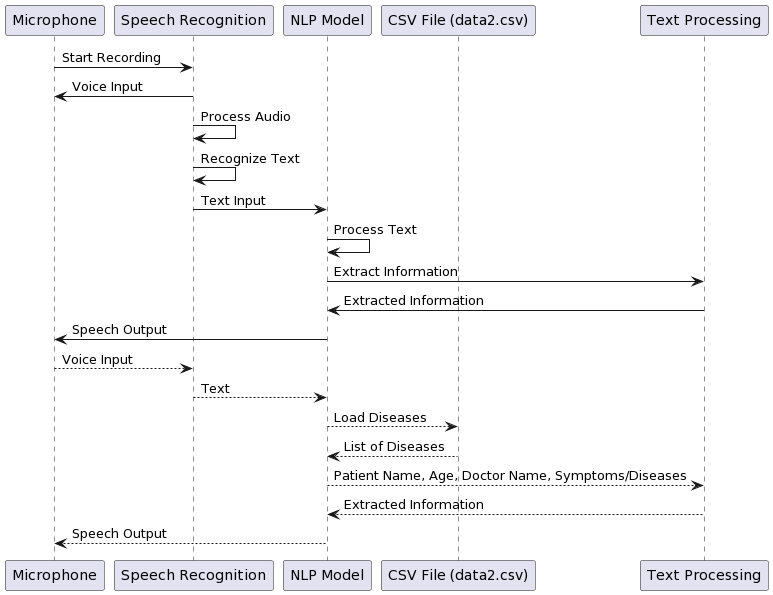

In [1]:
from IPython.display import Image

# Specify the image file path
image_path = "data.png"

# Display the image below the code cell
Image(filename=image_path)


# Entering Data in Excel (RAW)

In [ ]:
import spacy
import csv
import re
import speech_recognition as sr
import pandas as pd
from openpyxl import load_workbook

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Function to load diseases from "data2.csv"
def load_diseases(file_path):
    diseases = set()
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            diseases.add(row[0].strip().lower())
    return diseases

diseases_list = load_diseases("data2.csv")

def extract_information(text):
    doc = nlp(text)
    patient_name = None
    patient_age = None
    doctor_name = None
    symptoms_and_diseases = []
    
    for entity in doc.ents:
        if entity.label_ == "PERSON":
            if not patient_name:
                patient_name = entity.text
            elif not doctor_name:
                doctor_name = entity.text
        elif entity.label_ == "DATE":
            if not patient_age:
                patient_age = entity.text

    disease_patterns = [re.escape(d) for d in diseases_list]
    disease_pattern = re.compile(r'\b(?:' + '|'.join(disease_patterns) + r')\b', re.I)

    symptom_pattern = re.compile(r'\b(?:fever|nausea|migraines|dizziness|pain|fatigue|malaise|anxiety|panic|difficulty concentrating)\b', re.I)

    symptoms = re.findall(symptom_pattern, text)
    diseases = re.findall(disease_pattern, text)

    symptoms_and_diseases.extend(symptoms)
    symptoms_and_diseases.extend(diseases)

    return patient_name, patient_age, doctor_name, symptoms_and_diseases

def recognize_speech():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("Speak something...")
        audio = recognizer.listen(source)

    try:
        text = recognizer.recognize_google(audio)
        return text
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand audio.")
    except sr.RequestError as e:
        print(f"Could not request results from Google Speech Recognition service; {e}")

if __name__ == "__main__":
    text = recognize_speech()
    if text:
        print("You said: ", text)
        patient_name, patient_age, doctor_name, symptoms_and_diseases = extract_information(text)
        print("Patient Name:", patient_name)
        print("Patient Age:", patient_age)
        print("Doctor Name:", doctor_name)
        if symptoms_and_diseases:
            print("Symptoms/Diseases Found:", ", ".join(symptoms_and_diseases))

        # Open the Excel file
        excel_file_name = "pdata.xlsx"  # Replace with your actual file name
        workbook = load_workbook(excel_file_name)

        # Select the sheet to populate
        sheet = workbook["Sheet1"]  # Replace with your actual sheet name

        # Define the data you want to enter
        new_data = [
            (len(sheet['A']) + 1, patient_name, patient_age, doctor_name, ", ".join(symptoms_and_diseases))
        ]

        # Find the last row with data to determine where to append the new data
        last_row = sheet.max_row

        # Iterate over the new data and populate the cells
        for row_data in new_data:
            last_row += 1
            sheet.cell(row=last_row, column=1, value=row_data[0])  # S.NO
            sheet.cell(row=last_row, column=2, value=row_data[1])  # Patient Name
            sheet.cell(row=last_row, column=3, value=row_data[2])  # Patient Age
            sheet.cell(row=last_row, column=4, value=row_data[3])  # Doctor Name
            sheet.cell(row=last_row, column=5, value=row_data[4])  # Symptoms and Diseases

        # Save the Excel file with the new data
        workbook.save(excel_file_name)
        print("Data added to pdata.xlsx")


In [2]:
import pandas as pd
excel_file_name = "pdata.xlsx"
df = pd.read_excel(excel_file_name, sheet_name="Sheet1")
df

,S.NO,Encrypted Patient Name,Encrypted Patient Age,Encrypted Doctor Name,Encrypted Symptoms and Diseases
0,2,gAAAAABl8Gzt0WSIafnq7p_voMn7550h2v0d60Smmo70H5...,NaN,gAAAAABl8Gzt2SuLgxjbjoX34PYZufHvrk_IhwOVmn9IfY...,NaN
1,3,gAAAAABl8G_s4Pg55nPpy9UWQm1QMpP6f1Nm-QCl2eHm1-...,NaN,gAAAAABl8G_s7d14SVkxUDFrStCst3EwcZQ15RAyVkCJv3...,NaN
2,4,NaN,NaN,NaN,NaN
3,5,gAAAAABl8HRoYcNyM15NbQ2ECKhG0ZbRw48jJ9il5UyB2Y...,NaN,gAAAAABl8HRoeGh-gcfOIGkru7ba-ZDaqReSCBSGx76waE...,NaN


# Implement of AES encryption on RAW Data

In [14]:
from cryptography.fernet import Fernet

# Generate a random AES key
def generate_aes_key():
    return Fernet.generate_key()

# Encrypt data using AES
def encrypt_data(data, aes_key):
    fernet = Fernet(aes_key)
    encrypted_data = fernet.encrypt(data.encode())
    return encrypted_data

# Decrypt data using AES
def decrypt_data(encrypted_data, aes_key):
    fernet = Fernet(aes_key)
    decrypted_data = fernet.decrypt(encrypted_data).decode()
    return decrypted_data

# Your extracted patient information
patient_info = {
    "Patient Name": "Renu Jain",
    "Patient Age": "about 14 years",
    "Doctor Name": "Dr Jaishankar",
    "Symptoms/Diseases Found": "fever, typhoid, dengue"
}

# Generate an AES key (store this securely, you'll need it for decryption)
aes_key = generate_aes_key()

# Encrypt patient information
encrypted_patient_info = {}
for key, value in patient_info.items():
    encrypted_value = encrypt_data(value, aes_key)
    encrypted_patient_info[key] = encrypted_value

# Print the encrypted information (you would typically save it securely)
for key, value in encrypted_patient_info.items():
    print(f"{key}: {value}")

# Decrypt and display the information
decrypted_patient_info = {}
for key, value in encrypted_patient_info.items():
    decrypted_value = decrypt_data(value, aes_key)
    decrypted_patient_info[key] = decrypted_value

print("\nDecrypted Patient Information:")
for key, value in decrypted_patient_info.items():
    print(f"{key}: {value}")

print("This is AES key to decode= ", aes_key)

Patient Name: b'gAAAAABlUwn6eqNnwUAeYgATKmwLnRHQavQQlRZPIaNattGIWujiB7rsnAT6nVzuyXzYRvQrxm3IJJayso2L1tOnoi_GE1u7Tw=='
Patient Age: b'gAAAAABlUwn6IdpLioGTeI-C8St57bQv4GnrOhmVOE3RJ1suoxR36mCXjXE6-ncoUWqqks4Skqkk0_dspG_0G1cjWs0oEx-egw=='
Doctor Name: b'gAAAAABlUwn6VxyUqfpKYZpb7JKZeUfvih2w_GmIdOfHTqJ1IJat3Eh9jrK9BZcZWYZtDxaA8UotuMpxF2YMtKtGUIY7pYwwLQ=='
Symptoms/Diseases Found: b'gAAAAABlUwn6DLGE9arriu27hhGBN-U9H5vr8roGPxjJFiBROX31m6daNXDJhTsbX5JJTYS9ybtNfebirK_Ga-wnxoAYVX5AdRl1IXvjS27azlTv3uE6DUc='

Decrypted Patient Information:
Patient Name: Renu Jain
Patient Age: about 14 years
Doctor Name: Dr Jaishankar
Symptoms/Diseases Found: fever, typhoid, dengue
This is AES key to decode=  b'xqmgkVWQ0v9DyYDwGnRbjqU2TaPGAC-Y6HKAOZZpPKI='


# Lisining User voice till user says "Thank_You" * 2, Full code which uploades encrypted data and prints decrypted data.

In [2]:
import spacy
import csv
import re
import speech_recognition as sr
from cryptography.fernet import Fernet
from openpyxl import load_workbook

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")


def load_diseases(file_path):
    diseases = set()
    with open(file_path, 'r') as file:   #to load diseases from "data2.csv"
        reader = csv.reader(file)
        for row in reader:
            diseases.add(row[0].strip().lower())
    return diseases

diseases_list = load_diseases("data2.csv")

# Generating AES encryption Key
key = Fernet.generate_key()
fernet = Fernet(key)

def extract_information(text):
    doc = nlp(text)
    patient_name = None
    patient_age = None
    doctor_name = None
    symptoms_and_diseases = []
    
    for entity in doc.ents:
        if entity.label_ == "PERSON":
            if not patient_name:
                patient_name = entity.text
            elif not doctor_name:
                doctor_name = entity.text
        elif entity.label_ == "DATE":
            if not patient_age:
                patient_age = entity.text

    disease_patterns = [re.escape(d) for d in diseases_list]
    disease_pattern = re.compile(r'\b(?:' + '|'.join(disease_patterns) + r')\b', re.I)

    symptom_pattern = re.compile(r'\b(?:fever|nausea|migraines|dizziness|pain|fatigue|malaise|anxiety|panic|difficulty concentrating)\b', re.I)

    symptoms = re.findall(symptom_pattern, text)
    diseases = re.findall(disease_pattern, text)

    symptoms_and_diseases.extend(symptoms)
    symptoms_and_diseases.extend(diseases)

    # Encrypt the extracted information
    encrypted_patient_name = fernet.encrypt(patient_name.encode()) if patient_name else None
    encrypted_patient_age = fernet.encrypt(patient_age.encode()) if patient_age else None
    encrypted_doctor_name = fernet.encrypt(doctor_name.encode()) if doctor_name else None
    encrypted_symptoms_and_diseases = [fernet.encrypt(symptom.encode()) for symptom in symptoms_and_diseases]

    return encrypted_patient_name, encrypted_patient_age, encrypted_doctor_name, encrypted_symptoms_and_diseases

def recognize_speech():
    recognizer = sr.Recognizer()
    recognized_text = ""

    while True:
        with sr.Microphone() as source:
            print("Listening for input...")
            audio = recognizer.listen(source)

        try:
            text = recognizer.recognize_google(audio)
            print("You said: ", text)
            recognized_text += text + " "

            if "thank you" in text.lower():
                print("You said 'thank you.' Exiting the loop.")
                break

        except sr.UnknownValueError:
            print("Google Speech Recognition could not understand audio.")
        except sr.RequestError as e:
            print(f"Could not request results from Google Speech Recognition service; {e}")

    return recognized_text

if __name__ == "__main__":
    recognized_text = recognize_speech()
    if recognized_text:
        print("Recognized text:", recognized_text)
        patient_name, patient_age, doctor_name, symptoms_and_diseases = extract_information(recognized_text)
        
      
        if patient_name:
            decrypted_patient_name = fernet.decrypt(patient_name).decode()    #printing decrypted information
            print("Decrypted Patient Name:", decrypted_patient_name)
        if patient_age:
            decrypted_patient_age = fernet.decrypt(patient_age).decode()
            print("Decrypted Patient Age:", decrypted_patient_age)
        if doctor_name:
            decrypted_doctor_name = fernet.decrypt(doctor_name).decode()
            print("Decrypted Doctor Name:", decrypted_doctor_name)
        if symptoms_and_diseases:
            decrypted_symptoms_and_diseases = [fernet.decrypt(symptom).decode() for symptom in symptoms_and_diseases]
            print("Decrypted Symptoms/Diseases Found:", ", ".join(decrypted_symptoms_and_diseases))

      
        excel_file_name = "pdata.xlsx"    # Opening the Excel sheet
        workbook = load_workbook(excel_file_name)


        sheet = workbook["Sheet1"]  # sheet selection in excel

      
        new_data = [
            (len(sheet['A']) + 1, patient_name, patient_age, doctor_name, ", ".join(symptoms_and_diseases)) #enter data
        ]

        last_row = sheet.max_row  #rec of last row

        for row_data in new_data:
            last_row += 1
            sheet.cell(row=last_row, column=1, value=row_data[0])  # S.NO
            sheet.cell(row=last_row, column=2, value=row_data[1])  # Encrypted Patient Name
            sheet.cell(row=last_row, column=3, value=row_data[2])  # Encrypted Patient Age
            sheet.cell(row=last_row, column=4, value=row_data[3])  # Encrypted Doctor Name
            sheet.cell(row=last_row, column=5, value=row_data[4])  # Encrypted Symptoms and Diseases

        # Save the Excel file with the new data
        workbook.save(excel_file_name)
        print("Encrypted data added to pdata.xlsx")

Listening for input...
You said:  hey hello this is Sukumar I want to meet after Jaishankar I am suffering from fever cold headache from last three days thank you thank you
You said 'thank you.' Exiting the loop.
Recognized text: hey hello this is Sukumar I want to meet after Jaishankar I am suffering from fever cold headache from last three days thank you thank you 
Decrypted Patient Name: Sukumar
Decrypted Patient Age: last three days
Decrypted Doctor Name: Jaishankar
Decrypted Symptoms/Diseases Found: fever, cold


TypeError: sequence item 0: expected str instance, bytes found

In [16]:
key

b'UJkgRtcCdsAP7kHECBylqB9Pd5CrrI2Gjq27dmr7OMc='

In [14]:
import pandas as pd
excel_file_name = "pdata.xlsx"
df = pd.read_excel(excel_file_name, sheet_name="Sheet1")
df

,S.NO,Encrypted Patient Name,Encrypted Patient Age,Encrypted Doctor Name,Encrypted Symptoms and Diseases
0,2,gAAAAABl8Gzt0WSIafnq7p_voMn7550h2v0d60Smmo70H5...,NaN,gAAAAABl8Gzt2SuLgxjbjoX34PYZufHvrk_IhwOVmn9IfY...,NaN


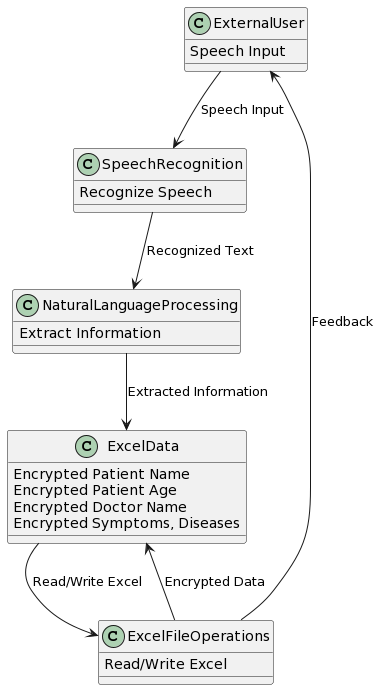

In [15]:
from IPython.display import Image
image_path = "img122.png"
Image(filename=image_path)


In [21]:
import spacy
import re
import speech_recognition as sr
from cryptography.fernet import Fernet
from openpyxl import Workbook
import csv
from datetime import datetime

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Generating AES encryption Key
key = Fernet.generate_key()
fernet = Fernet(key)

def load_diseases(filename):
    diseases_list = []
    with open(filename, 'r', newline='') as file:
        reader = csv.reader(file)
        for row in reader:
            diseases_list.extend(row)
    return diseases_list

def extract_information(text):
    doc = nlp(text)
    patient_name = None
    patient_age = None
    doctor_name = None
    symptoms_and_diseases = set()  # Use a set to store unique symptoms
    
    for entity in doc.ents:
        if entity.label_ == "PERSON":
            if not patient_name:
                patient_name = entity.text
            elif not doctor_name:
                doctor_name = entity.text
        elif entity.label_ == "DATE":
            if not patient_age:
                # Extracting the duration from the recognized text for age
                if entity.text.isdigit():  # If a number is present, consider it as age
                    patient_age = entity.text
                else:
                    # If not a number, consider it as a duration, for example "last 3 days"
                    patient_age = entity.text

    disease_patterns = [re.escape(d) for d in diseases_list]
    disease_pattern = re.compile(r'\b(?:' + '|'.join(disease_patterns) + r')\b', re.I)

    symptom_pattern = re.compile(r'\b(?:fever|nausea|migraines|dizziness|pain|fatigue|malaise|anxiety|panic|difficulty concentrating)\b', re.I)

    symptoms = re.findall(symptom_pattern, text)
    diseases = re.findall(disease_pattern, text)

    symptoms_and_diseases.update(symptoms)  # Use update to add elements to the set
    symptoms_and_diseases.update(diseases)

    # Encrypt the extracted information
    encrypted_patient_name = fernet.encrypt(patient_name.encode()) if patient_name else None
    encrypted_patient_age = fernet.encrypt(patient_age.encode()) if patient_age else None
    encrypted_doctor_name = fernet.encrypt(doctor_name.encode()) if doctor_name else None
    encrypted_symptoms_and_diseases = [fernet.encrypt(symptom.encode()) for symptom in symptoms_and_diseases]

    return encrypted_patient_name, encrypted_patient_age, encrypted_doctor_name, encrypted_symptoms_and_diseases

def recognize_speech():
    recognizer = sr.Recognizer()
    recognized_text = ""

    while True:
        with sr.Microphone() as source:
            print("Listening for input...")
            audio = recognizer.listen(source)

        try:
            text = recognizer.recognize_google(audio)
            print("You said: ", text)
            recognized_text += text + " "

            if "thank you" in text.lower():
                print("You said 'thank you.' Exiting the loop.")
                break

        except sr.UnknownValueError:
            print("Google Speech Recognition could not understand audio.")
        except sr.RequestError as e:
            print(f"Could not request results from Google Speech Recognition service; {e}")

    return recognized_text

def save_to_excel(patient_name, patient_age, doctor_name, symptoms_and_diseases, encryption_key):
    current_datetime = datetime.now()
    time_of_saving = current_datetime.strftime("%H%M")
    date_of_saving = current_datetime.strftime("%d%m%Y")
    
    wb = Workbook()
    ws = wb.active

    ws.append(["Encrypted Patient Name", "Encrypted Patient Age", "Encrypted Doctor Name", "Encrypted Symptoms and Diseases", "Encryption Key"])
    
    # Encrypting the data before saving to Excel
    encrypted_patient_name = fernet.encrypt(patient_name.encode()).decode() if patient_name else None
    encrypted_patient_age = fernet.encrypt(patient_age.encode()).decode() if patient_age else None
    encrypted_doctor_name = fernet.encrypt(doctor_name.encode()).decode() if doctor_name else None
    encrypted_symptoms_and_diseases = [fernet.encrypt(symptom.encode()).decode() for symptom in symptoms_and_diseases]

    ws.append([encrypted_patient_name, encrypted_patient_age, encrypted_doctor_name, ", ".join(encrypted_symptoms_and_diseases), encryption_key])

    file_name = f"{patient_name.lower().replace(' ', '')}{time_of_saving}{date_of_saving}.xlsx"
    wb.save(file_name)
    print(f"Data saved to {file_name}")

 

if __name__ == "__main__":
    diseases_list = load_diseases("data2.csv")
    recognized_text = recognize_speech()
    if recognized_text:
        print("Recognized text:", recognized_text)
        patient_name, patient_age, doctor_name, symptoms_and_diseases = extract_information(recognized_text)
        
        if patient_name:
            decrypted_patient_name = fernet.decrypt(patient_name).decode()    # Printing decrypted information
            print("Decrypted Patient Name:", decrypted_patient_name)
        if patient_age:
            decrypted_patient_age = fernet.decrypt(patient_age).decode()
            print("Decrypted Patient Age:", decrypted_patient_age)
        if doctor_name:
            decrypted_doctor_name = fernet.decrypt(doctor_name).decode()
            print("Decrypted Doctor Name:", decrypted_doctor_name)
        if symptoms_and_diseases:
            decrypted_symptoms_and_diseases = [fernet.decrypt(symptom).decode() for symptom in symptoms_and_diseases]
            print("Decrypted Symptoms/Diseases Found:", ", ".join(decrypted_symptoms_and_diseases))
        
        # Save data to Excel
        save_to_excel(decrypted_patient_name, decrypted_patient_age, decrypted_doctor_name, decrypted_symptoms_and_diseases, key)


Listening for input...
You said:  hi I want to meet Dr Jaishankar where I am 4 years old I am feeling high fever and vomit sensation thank you thank you
You said 'thank you.' Exiting the loop.
Recognized text: hi I want to meet Dr Jaishankar where I am 4 years old I am feeling high fever and vomit sensation thank you thank you 
Decrypted Patient Name: Dr Jaishankar
Decrypted Patient Age: 4 years old
Decrypted Symptoms/Diseases Found: fever,  high fever
Data saved to drjaishankar152214032024.xlsx


In [20]:
t1= Hi i want to meet dr jaishankar where im 4 years old im felling high fever and vomit sentation thank you
t2 = Hi im dr reventh im 14 years old i want to meet dr amit.
t3 = hi i want to meet doctor amit im sukumar i feel headache and swellings



SyntaxError: invalid syntax (3560938619.py, line 1)

In [ ]:
import spacy
import re
import speech_recognition as sr
from cryptography.fernet import Fernet
from openpyxl import Workbook
import csv
from datetime import datetime

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Generating AES encryption Key
key = Fernet.generate_key()
fernet = Fernet(key)

def load_diseases(filename):
    diseases_list = []
    with open(filename, 'r', newline='') as file:
        reader = csv.reader(file)
        for row in reader:
            diseases_list.extend(row)
    return diseases_list

def extract_information(text):
    doc = nlp(text)
    patient_name = None
    patient_age = None
    doctor_name = None
    symptoms_and_diseases = set()  # Use a set to store unique symptoms
    
    for entity in doc.ents:
        if entity.label_ == "PERSON":
            if not patient_name:
                patient_name = entity.text
            elif not doctor_name:
                doctor_name = entity.text
        elif entity.label_ == "DATE":
            if not patient_age:
                # Extracting the duration from the recognized text for age
                if entity.text.isdigit():  # If a number is present, consider it as age
                    patient_age = entity.text
                else:
                    # If not a number, consider it as a duration, for example "last 3 days"
                    patient_age = entity.text

    disease_patterns = [re.escape(d) for d in diseases_list]
    disease_pattern = re.compile(r'\b(?:' + '|'.join(disease_patterns) + r')\b', re.I)

    symptom_pattern = re.compile(r'\b(?:fever|nausea|migraines|dizziness|pain|fatigue|malaise|anxiety|panic|difficulty concentrating)\b', re.I)

    symptoms = re.findall(symptom_pattern, text)
    diseases = re.findall(disease_pattern, text)

    symptoms_and_diseases.update(symptoms)  # Use update to add elements to the set
    symptoms_and_diseases.update(diseases)

    # Encrypt the extracted information
    encrypted_patient_name = fernet.encrypt(patient_name.encode()) if patient_name else None
    encrypted_patient_age = fernet.encrypt(patient_age.encode()) if patient_age else None
    encrypted_doctor_name = fernet.encrypt(doctor_name.encode()) if doctor_name else None
    encrypted_symptoms_and_diseases = [fernet.encrypt(symptom.encode()) for symptom in symptoms_and_diseases]

    return encrypted_patient_name, encrypted_patient_age, encrypted_doctor_name, encrypted_symptoms_and_diseases

def recognize_speech():
    recognizer = sr.Recognizer()
    recognized_text = ""

    while True:
        with sr.Microphone() as source:
            print("Hi this is your Secure Medical Assistant")
            print("Listening for input...")
            audio = recognizer.listen(source)

        try:
            text = recognizer.recognize_google(audio)
            print("You said: ", text)
            recognized_text += text + " "

            if "thank you" in text.lower():
                print("You said 'thank you.' Exiting the loop.")
                break

        except sr.UnknownValueError:
            print("Google Speech Recognition could not understand audio.")
        except sr.RequestError as e:
            print(f"Could not request results from Google Speech Recognition service; {e}")

    return recognized_text

def save_to_excel(patient_name, patient_age, doctor_name, symptoms_and_diseases, encryption_key):
    current_datetime = datetime.now()
    time_of_saving = current_datetime.strftime("%H%M")
    date_of_saving = current_datetime.strftime("%d%m%Y")
    
    wb = Workbook()
    ws = wb.active

    ws.append(["Encrypted Patient Name", "Encrypted Patient Age", "Encrypted Doctor Name", "Encrypted Symptoms and Diseases", "Encryption Key"])
    
    # Encrypting the data before saving to Excel
    encrypted_patient_name = fernet.encrypt(patient_name.encode()).decode() if patient_name else None
    encrypted_patient_age = fernet.encrypt(patient_age.encode()).decode() if patient_age else None
    encrypted_doctor_name = fernet.encrypt(doctor_name.encode()).decode() if doctor_name else None
    encrypted_symptoms_and_diseases = [fernet.encrypt(symptom.encode()).decode() for symptom in symptoms_and_diseases]

    ws.append([encrypted_patient_name, encrypted_patient_age, encrypted_doctor_name, ", ".join(encrypted_symptoms_and_diseases), encryption_key])

    file_name = f"{patient_name.lower().replace(' ', '')}{time_of_saving}{date_of_saving}.xlsx"
    wb.save(file_name)
    print(f"Data saved to {file_name}")

 

if __name__ == "__main__":
    diseases_list = load_diseases("data2.csv")
    recognized_text = recognize_speech()
    if recognized_text:
        print("Recognized text:", recognized_text)
        patient_name, patient_age, doctor_name, symptoms_and_diseases = extract_information(recognized_text)
        
        if patient_name:
            decrypted_patient_name = fernet.decrypt(patient_name).decode()    # Printing decrypted information
            print("Decrypted Patient Name:", decrypted_patient_name)
        if patient_age:
            decrypted_patient_age = fernet.decrypt(patient_age).decode()
            print("Decrypted Patient Age:", decrypted_patient_age)
        if doctor_name:
            decrypted_doctor_name = fernet.decrypt(doctor_name).decode()
            print("Decrypted Doctor Name:", decrypted_doctor_name)
        if symptoms_and_diseases:
            decrypted_symptoms_and_diseases = [fernet.decrypt(symptom).decode() for symptom in symptoms_and_diseases]
            print("Decrypted Symptoms/Diseases Found:", ", ".join(decrypted_symptoms_and_diseases))
        
        # Save data to Excel
        save_to_excel(decrypted_patient_name, decrypted_patient_age, decrypted_doctor_name, decrypted_symptoms_and_diseases, key)


Hi this is your Secure Medical Assistant
Listening for input...
You said:  hi this is Sukumar
Hi this is your Secure Medical Assistant
Listening for input...
Google Speech Recognition could not understand audio.
Hi this is your Secure Medical Assistant
Listening for input...


In [1]:
import spacy
import re
import speech_recognition as sr
from cryptography.fernet import Fernet
from openpyxl import Workbook
import csv
from datetime import datetime
from gtts import gTTS
import pygame
import os

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Generating AES encryption Key
key = Fernet.generate_key()
fernet = Fernet(key)

def load_diseases(filename):
    diseases_list = []
    with open(filename, 'r', newline='') as file:
        reader = csv.reader(file)
        for row in reader:
            diseases_list.extend(row)
    return diseases_list

def extract_information(text):
    doc = nlp(text)
    patient_name = None
    patient_age = None
    doctor_name = None
    symptoms_and_diseases = set()  # Use a set to store unique symptoms
    
    for entity in doc.ents:
        if entity.label_ == "PERSON":
            if not patient_name:
                patient_name = entity.text
            elif not doctor_name:
                doctor_name = entity.text
        elif entity.label_ == "DATE":
            if not patient_age:
                # Extracting the duration from the recognized text for age
                if entity.text.isdigit():  # If a number is present, consider it as age
                    patient_age = entity.text
                else:
                    # If not a number, consider it as a duration, for example "last 3 days"
                    patient_age = entity.text

    disease_patterns = [re.escape(d) for d in diseases_list]
    disease_pattern = re.compile(r'\b(?:' + '|'.join(disease_patterns) + r')\b', re.I)

    symptom_pattern = re.compile(r'\b(?:fever|nausea|migraines|dizziness|pain|fatigue|malaise|anxiety|panic|difficulty concentrating)\b', re.I)

    symptoms = re.findall(symptom_pattern, text)
    diseases = re.findall(disease_pattern, text)

    symptoms_and_diseases.update(symptoms)  # Use update to add elements to the set
    symptoms_and_diseases.update(diseases)

    # Encrypt the extracted information
    encrypted_patient_name = fernet.encrypt(patient_name.encode()) if patient_name else None
    encrypted_patient_age = fernet.encrypt(patient_age.encode()) if patient_age else None
    encrypted_doctor_name = fernet.encrypt(doctor_name.encode()) if doctor_name else None
    encrypted_symptoms_and_diseases = [fernet.encrypt(symptom.encode()) for symptom in symptoms_and_diseases]

    return encrypted_patient_name, encrypted_patient_age, encrypted_doctor_name, encrypted_symptoms_and_diseases

def recognize_speech():
    assistant_message = "Hi, this is your Secure Medical Assistant, Please not this is your virtual assistant, Please make sure that. when you are telling your transcript do not use any Honorifics before your name. and mandatory terms to mention. your name, age, doctor name if you have any specific, And your Disease symptoms,. Thank You "
    tts = gTTS(text=assistant_message, lang='en')
    tts.save("assistant_message.mp3")
    pygame.mixer.init()
    pygame.mixer.music.load("assistant_message.mp3")
    pygame.mixer.music.play()
    while pygame.mixer.music.get_busy():
        continue
    
    recognizer = sr.Recognizer()
    recognized_text = ""

    while True:
        with sr.Microphone() as source:
            print("Listening for input...")
            audio = recognizer.listen(source)

        try:
            text = recognizer.recognize_google(audio)
            print("You said: ", text)
            recognized_text += text + " "

            if "thank you" in text.lower():
                print("You said 'thank you.' Exiting the loop.")
                break

        except sr.UnknownValueError:
            print("Google Speech Recognition could not understand audio.")
        except sr.RequestError as e:
            print(f"Could not request results from Google Speech Recognition service; {e}")

    return recognized_text

def save_to_excel(patient_name, patient_age, doctor_name, symptoms_and_diseases, encryption_key):
    current_datetime = datetime.now()
    time_of_saving = current_datetime.strftime("%H%M")
    date_of_saving = current_datetime.strftime("%d%m%Y")
    
    wb = Workbook()
    ws = wb.active

    ws.append(["Encrypted Patient Name", "Encrypted Patient Age", "Encrypted Doctor Name", "Encrypted Symptoms and Diseases", "Encryption Key"])
    
    # Encrypting the data before saving to Excel
    encrypted_patient_name = fernet.encrypt(patient_name.encode()).decode() if patient_name else None
    encrypted_patient_age = fernet.encrypt(patient_age.encode()).decode() if patient_age else None
    encrypted_doctor_name = fernet.encrypt(doctor_name.encode()).decode() if doctor_name else None
    encrypted_symptoms_and_diseases = [fernet.encrypt(symptom.encode()).decode() for symptom in symptoms_and_diseases]

    ws.append([encrypted_patient_name, encrypted_patient_age, encrypted_doctor_name, ", ".join(encrypted_symptoms_and_diseases), encryption_key])

    file_name = f"{patient_name.lower().replace(' ', '')}{time_of_saving}{date_of_saving}.xlsx"
    wb.save(file_name)
    print(f"Data saved to {file_name}")

 

if __name__ == "__main__":
    diseases_list = load_diseases("data2.csv")
    recognized_text = recognize_speech()
    if recognized_text:
        print("Recognized text:", recognized_text)
        patient_name, patient_age, doctor_name, symptoms_and_diseases = extract_information(recognized_text)
        
        if patient_name:
            decrypted_patient_name = fernet.decrypt(patient_name).decode()    # Printing decrypted information
            print("Decrypted Patient Name:", decrypted_patient_name)
        if patient_age:
            decrypted_patient_age = fernet.decrypt(patient_age).decode()
            print("Decrypted Patient Age:", decrypted_patient_age)
        if doctor_name:
            decrypted_doctor_name = fernet.decrypt(doctor_name).decode()
            print("Decrypted Doctor Name:", decrypted_doctor_name)
        if symptoms_and_diseases:
            decrypted_symptoms_and_diseases = [fernet.decrypt(symptom).decode() for symptom in symptoms_and_diseases]
            print("Decrypted Symptoms/Diseases Found:", ", ".join(decrypted_symptoms_and_diseases))
        
        # Save data to Excel
        save_to_excel(decrypted_patient_name, decrypted_patient_age, decrypted_doctor_name, decrypted_symptoms_and_diseases, key)


pygame 2.5.2 (SDL 2.28.3, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
Listening for input...
You said:  hay hello my name is John Peterson I want to meet doctor Smith well I have been suffered from kind of headache you know like my heads or fuzzy and I am just not myself so I thought I should come in and get it checked out it's been bothering me from a long way I hope it's nothing serious but I just want to be sure and I am 32 years old if that helps thank you thank you
You said 'thank you.' Exiting the loop.
Recognized text: hay hello my name is John Peterson I want to meet doctor Smith well I have been suffered from kind of headache you know like my heads or fuzzy and I am just not myself so I thought I should come in and get it checked out it's been bothering me from a long way I hope it's nothing serious but I just want to be sure and I am 32 years old if that helps thank you thank you 
Decrypted Patient Name: John Peterson
Decrypted Patie